# Layout Demo

In [1]:
import numpy as np
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import meep as mp
import gplugins.modes as gm
import ipympl

2024-02-02 10:32:11.133 | INFO     | gplugins.gmeep:<module>:39 - Meep '1.28.0' installed at ['/home/parkeraa/miniconda3/envs/mp/lib/python3.11/site-packages/meep']


In [2]:
import gdsfactory as gf
import ubcpdk
import ubcpdk.components as uc

gf.CONF.display_type = "klayout"

2024-02-02 10:32:24.512 | INFO     | gdsfactory.technology.layer_views:__init__:790 - Importing LayerViews from YAML file: '/home/parkeraa/miniconda3/envs/mp/lib/python3.11/site-packages/ubcpdk/layers.yaml'.
2024-02-02 10:32:24.572 | INFO     | ubcpdk:<module>:30 - Found UBCpdk '2.3.4' installed at PosixPath('/home/parkeraa/miniconda3/envs/mp/lib/python3.11/site-packages/ubcpdk')
2024-02-02 10:32:24.676 | INFO     | gdsfactory.technology.layer_views:__init__:790 - Importing LayerViews from YAML file: '/home/parkeraa/miniconda3/envs/mp/lib/python3.11/site-packages/gdsfactory/generic_tech/layer_views.yaml'.
2024-02-02 10:32:24.684 | INFO     | gdsfactory.pdk:activate:307 - 'ubcpdk' PDK is now active


In [3]:
mzi = uc.mzi(delta_length=80, length_x=1, length_y=20)
TE_MZI = uc.add_fiber_array(component=mzi, component_name='MyCoolMZI1')
TE_MZI.plot()

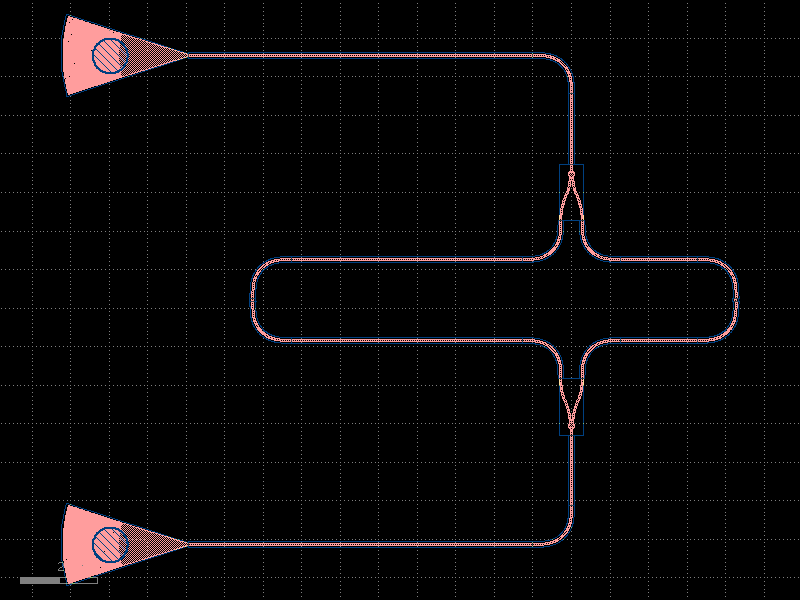

In [4]:
plt.show()

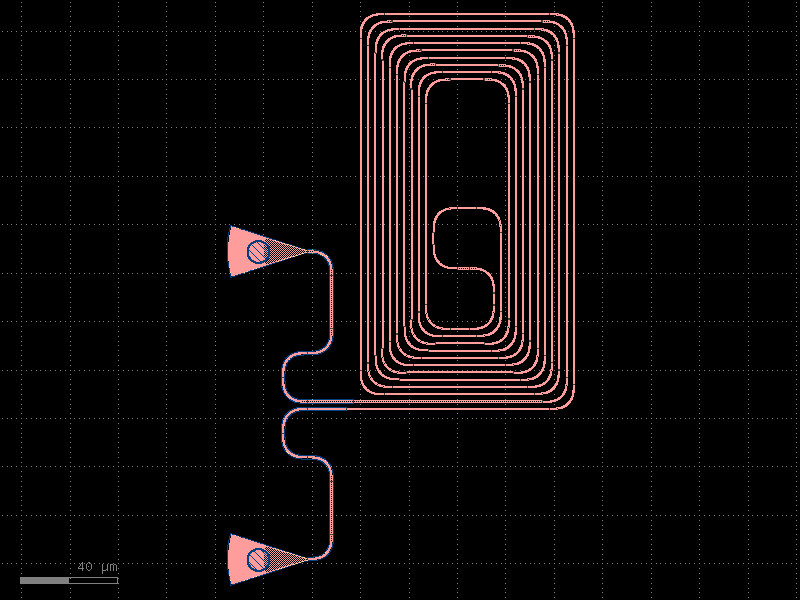

In [6]:
wg = gf.components.spiral_external_io(x_inner_length_cutback=50)
delay_line_1 = uc.add_fiber_array(component=wg, component_name='MyCoolDelayLine1')
delay_line_1.plot()
plt.show()

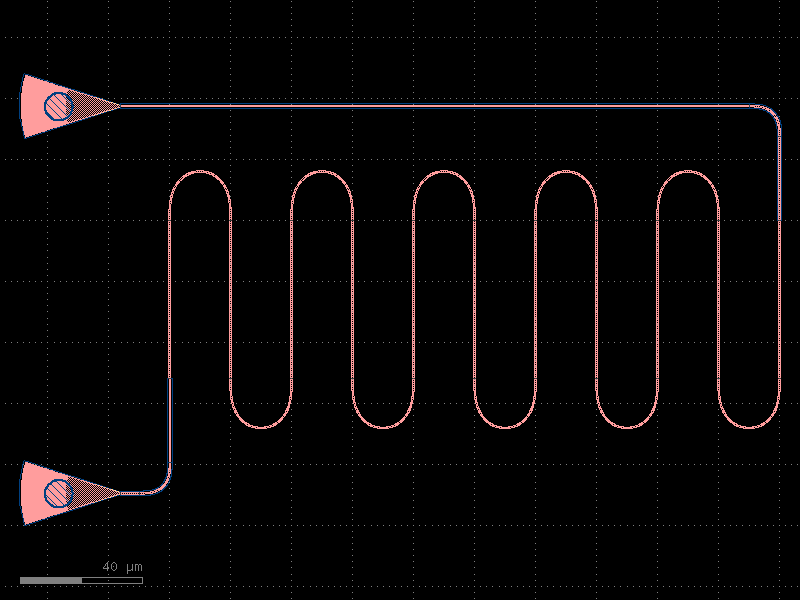

In [8]:
wg = gf.components.delay_snake2(length=1000, n=10)
delay_line_2 = uc.add_fiber_array(component=wg, component_name='MyCoolDelayLine2')
delay_line_2.plot()
plt.show()

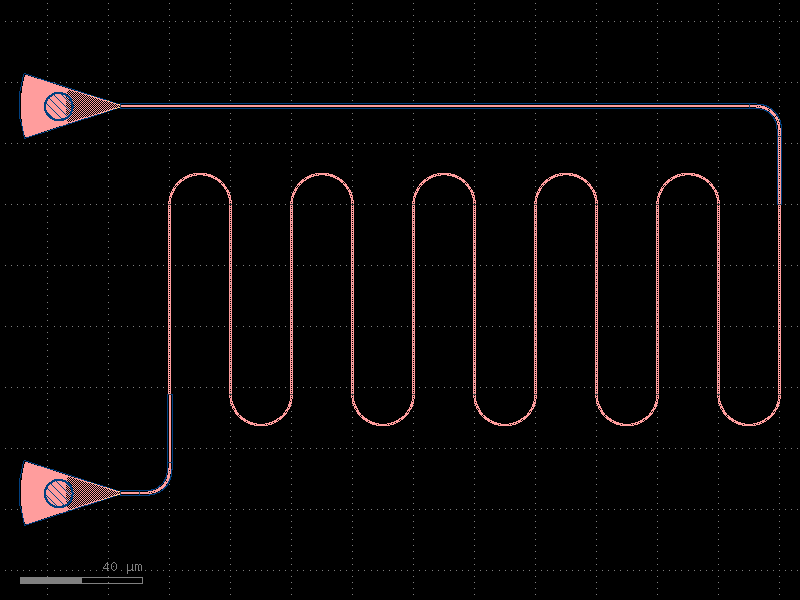

In [11]:
wg = gf.components.delay_snake2(length=1000, n=10, bend180="bend_circular180")
delay_line_2 = uc.add_fiber_array(component=wg, component_name='MyCoolDelayLine2')
delay_line_2.plot()
plt.show()

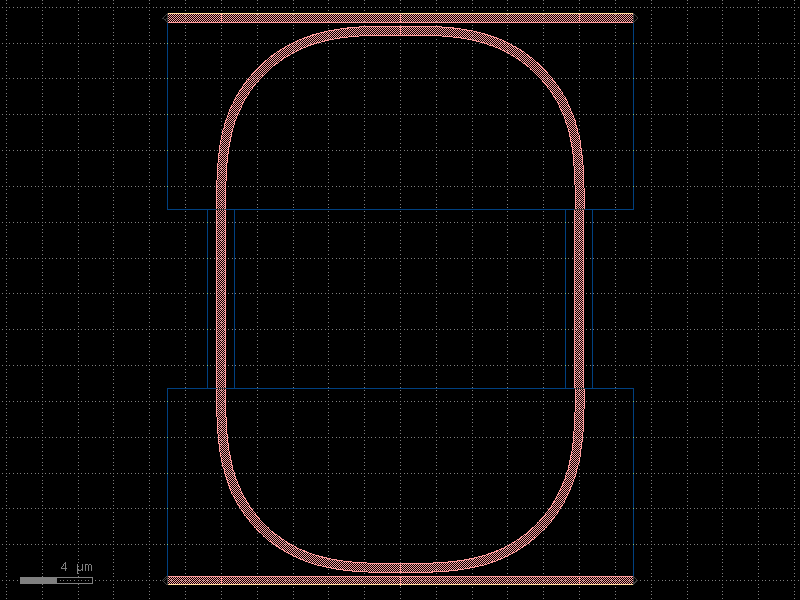

In [13]:
r1 = uc.ring_double(length_y=0)
r2 = uc.ring_double(length_y=5)
r3 = uc.ring_double(length_y=10)

r1.plot()
r2.plot()
r3.plot()

plt.show()

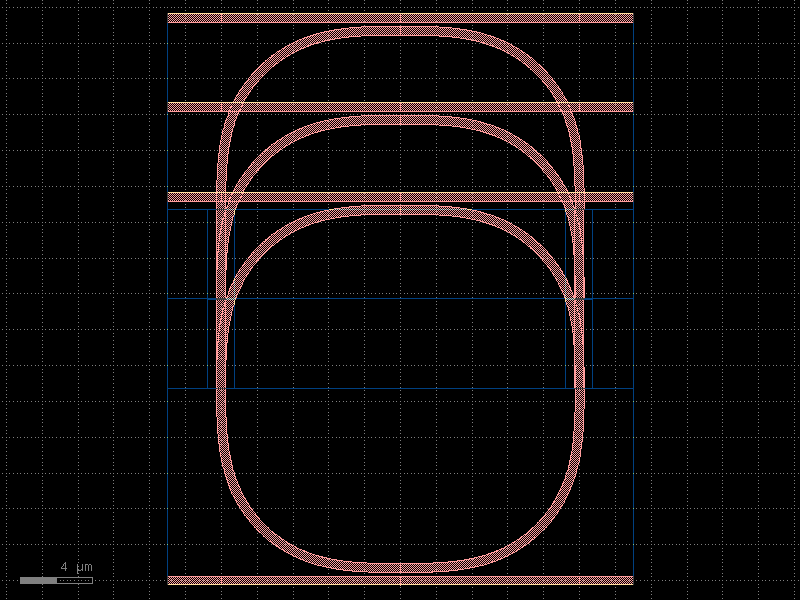

In [14]:
my_device = gf.Component(name="MyDevice")
ring1 = my_device.add_ref(r1)
ring2 = my_device.add_ref(r2)
ring3 = my_device.add_ref(r3)

my_device.plot()
plt.show()

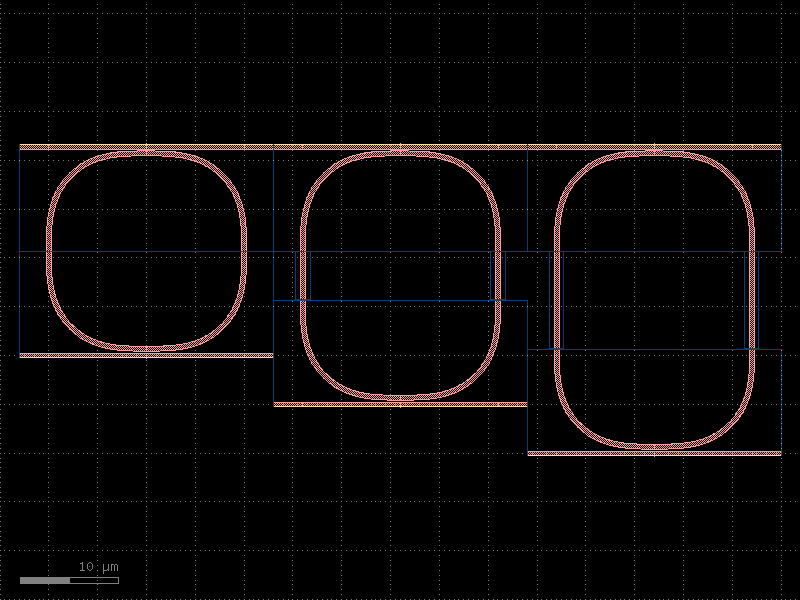

In [16]:
ring2.connect(port="o3", destination=ring1.ports["o4"])
ring3.connect(port="o3", destination=ring2.ports["o4"])

my_device.plot()
plt.show()

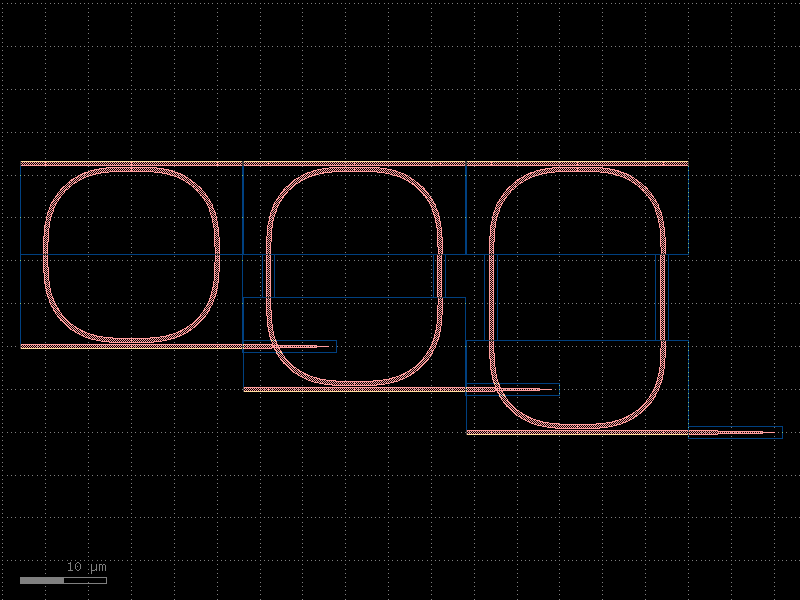

In [17]:
end = uc.ebeam_terminator_te1550()

end1 = my_device.add_ref(end)
end2 = my_device.add_ref(end)
end3 = my_device.add_ref(end)

end1.connect(port="o1", destination=ring1.ports["o2"])
end2.connect(port="o1", destination=ring2.ports["o2"])
end3.connect(port="o1", destination=ring3.ports["o2"])

my_device.plot()
plt.show()

In [ ]:
plt.close('all')

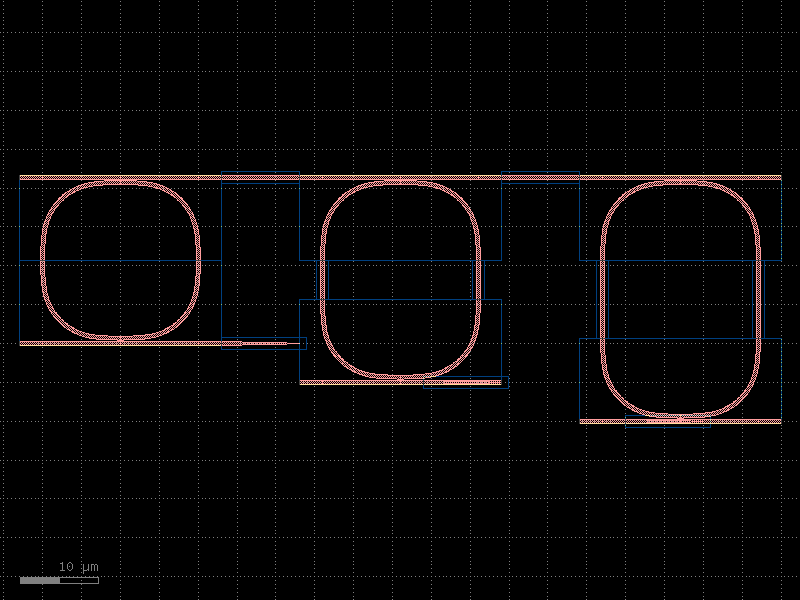

In [18]:
wg = uc.straight(length=10)

wg1 = my_device.add_ref(wg)
wg2 = my_device.add_ref(wg)

wg1.connect(port="o1", destination=ring1.ports["o4"])
ring2.connect(port="o3", destination=wg1.ports["o2"])
wg2.connect(port="o1", destination=ring2.ports["o4"])
ring3.connect(port="o3", destination=wg2.ports["o2"])

my_device.plot()
plt.show()


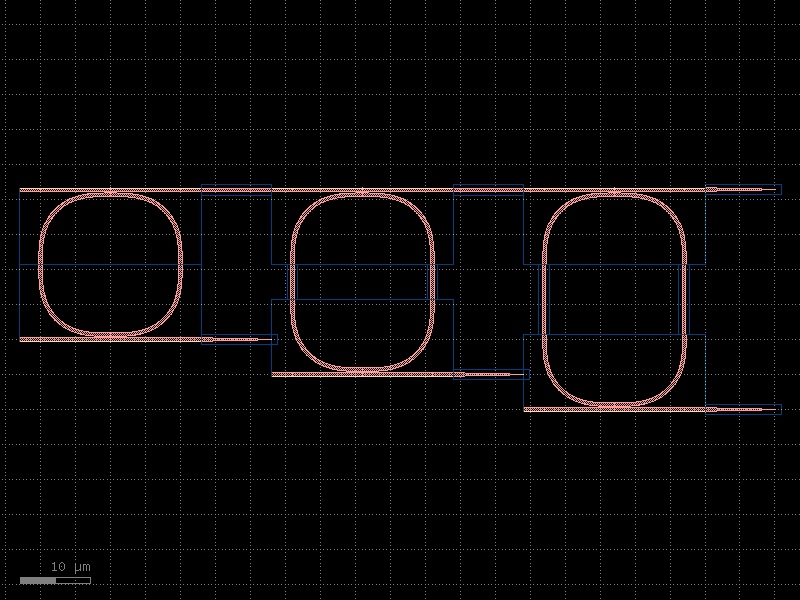

In [20]:
end2.connect(port="o1", destination=ring2.ports["o2"])
end3.connect(port="o1", destination=ring3.ports["o2"])

end4 = my_device.add_ref(end)   
end4.connect(port="o1", destination=ring3.ports["o4"])


my_device.plot()
plt.show()

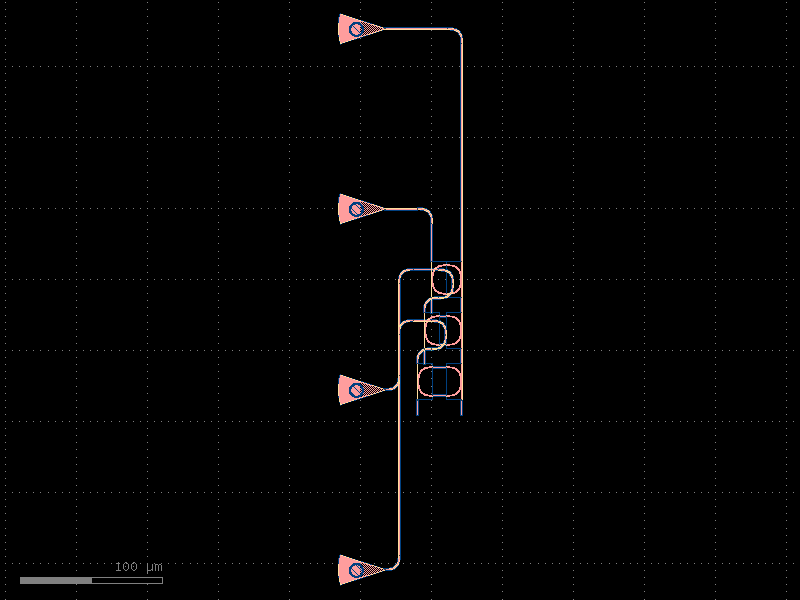

In [21]:
my_device.add_port(name="o1", port=ring1.ports["o1"])
my_device.add_port(name="o2", port=ring1.ports["o3"])
my_device.add_port(name="o3", port=ring2.ports["o1"])
my_device.add_port(name="o4", port=ring3.ports["o1"])

my_device_fibers = uc.add_fiber_array(component=my_device, component_name='MyCoolDevice1')

my_device_fibers.plot()
plt.show()

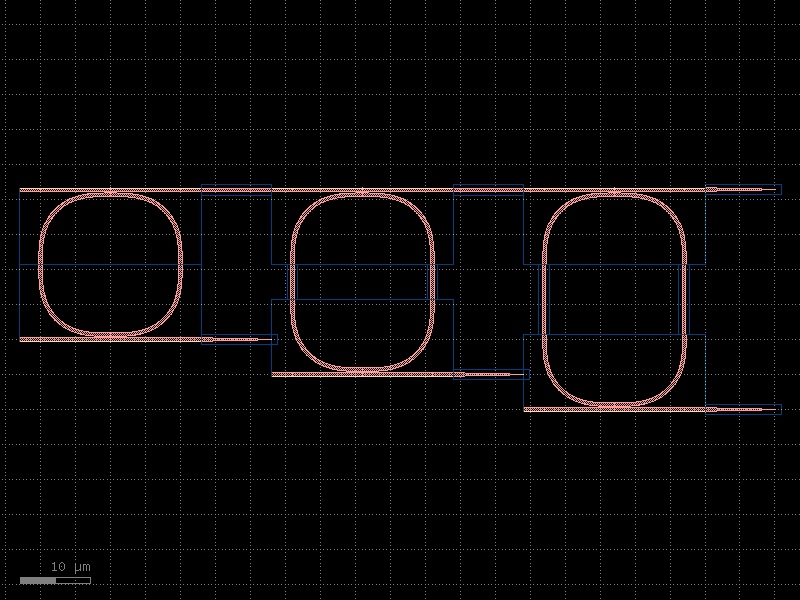

In [27]:
my_device = gf.Component(name="MyDevice")

ring1 = my_device.add_ref(r1)
ring2 = my_device.add_ref(r2)
ring3 = my_device.add_ref(r3)

end = uc.ebeam_terminator_te1550()
end1 = my_device.add_ref(end)
end2 = my_device.add_ref(end)
end3 = my_device.add_ref(end)
end4 = my_device.add_ref(end)   

wg = uc.straight(length=10)
wg1 = my_device.add_ref(wg)
wg2 = my_device.add_ref(wg)

wg1.connect(port="o1", destination=ring1.ports["o4"])
ring2.connect(port="o3", destination=wg1.ports["o2"])
wg2.connect(port="o1", destination=ring2.ports["o4"])
ring3.connect(port="o3", destination=wg2.ports["o2"])

end1.connect(port="o1", destination=ring1.ports["o2"])
end2.connect(port="o1", destination=ring2.ports["o2"])
end3.connect(port="o1", destination=ring3.ports["o2"])
end4.connect(port="o1", destination=ring3.ports["o4"])

my_device.plot()
plt.show()

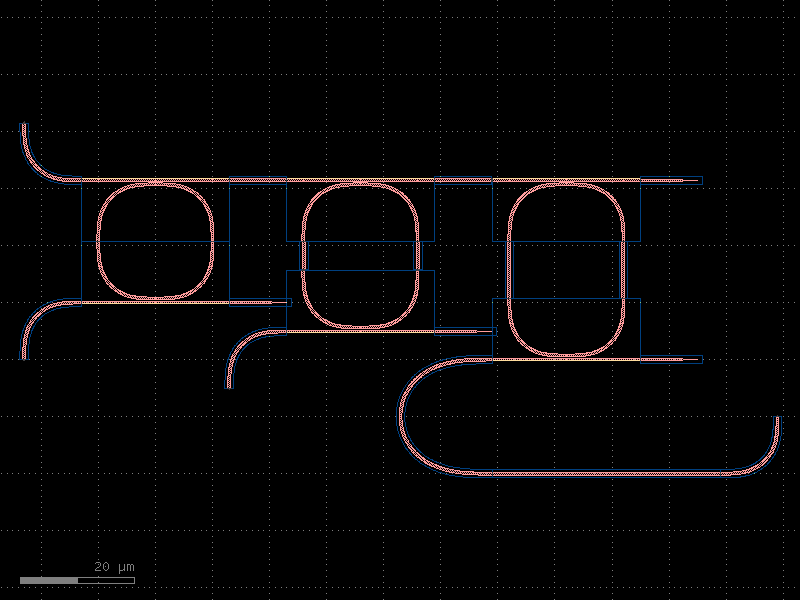

In [28]:
bend = uc.bend()
bend_180 = uc.bend_euler180_sc()

bend1 = my_device.add_ref(bend)
bend2 = my_device.add_ref(bend)
bend3 = my_device.add_ref(bend)
bend_180 = my_device.add_ref(bend_180)
wg_out = my_device.add_ref(uc.straight(40))
bend4 = my_device.add_ref(bend)

bend1.connect('o2', ring1.ports['o3'])
bend2.connect('o1', ring1.ports['o1'])
bend3.connect('o1', ring2.ports['o1'])
bend_180.connect('o1', ring3.ports['o1'])
wg_out.connect('o1', bend_180.ports['o2'])
bend4.connect('o1', wg_out.ports['o2'])

my_device.add_port(name="o2", port=bend2.ports["o2"])
my_device.add_port(name="o1", port=bend1.ports["o1"])
my_device.add_port(name="o3", port=bend3.ports["o2"])
my_device.add_port(name="o4", port=bend4.ports["o2"])


my_device.plot()
plt.show()

In [29]:
my_device_fibers = uc.add_fiber_array(component=my_device.rotate(), component_name='MyCoolDevice1')

my_device_fibers.plot()

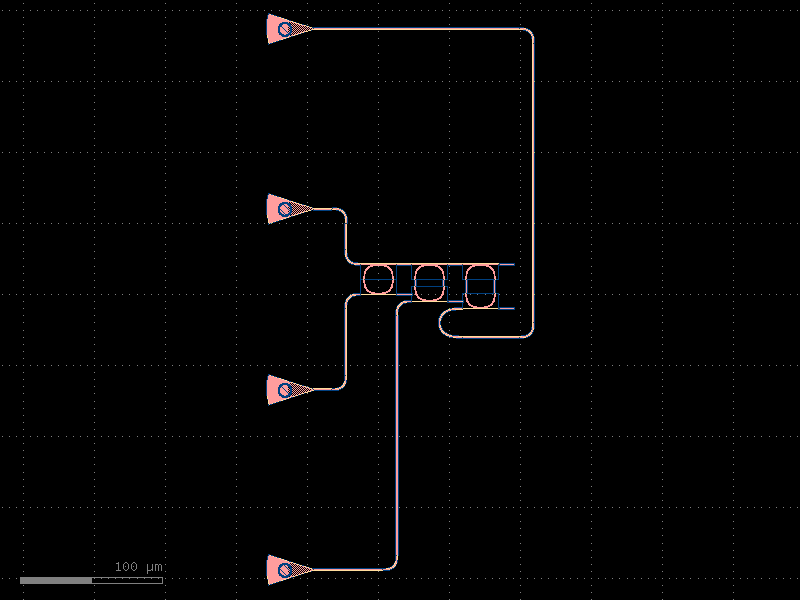

In [30]:
plt.show()

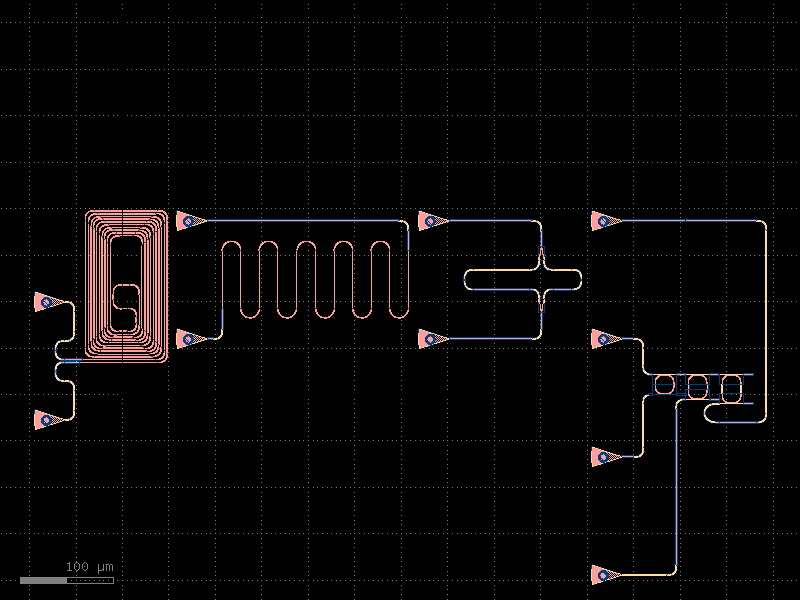

In [31]:
my_submission = gf.Component(name="MySubmission")
floorplan = gf.components.rectangle(size=(605, 410), layer='FLOORPLAN')
dl1 = my_submission.add_ref(delay_line_1)
dl2 = my_submission.add_ref(delay_line_2)
mzi = my_submission.add_ref(TE_MZI)
my = my_submission.add_ref(my_device_fibers)

my_submission.distribute(elements=(dl1, dl2, mzi, my), direction='x', spacing=10, separation=True)
my_submission.align(elements=(dl1, dl2, mzi, my), alignment='ymax')

my_submission.add_ref(floorplan)

my_submission.plot()
plt.show()

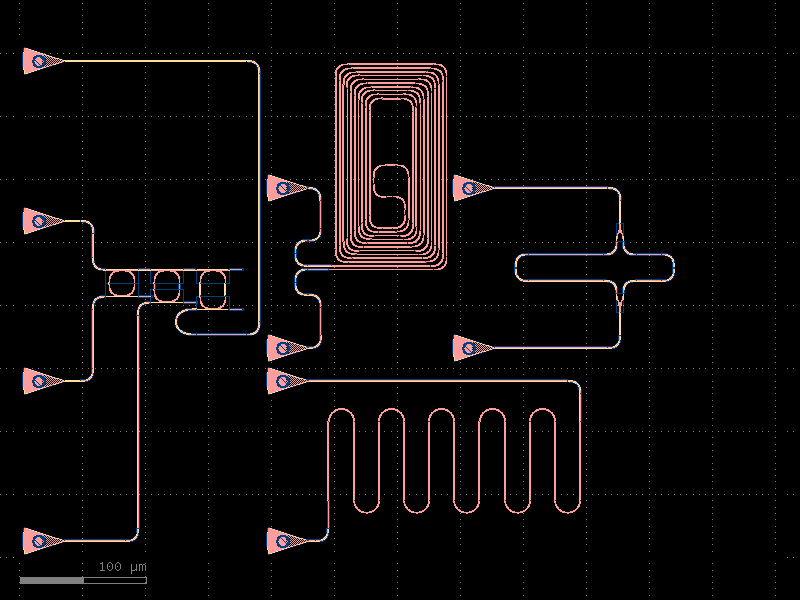

In [39]:
floorplan = gf.components.rectangle(size=(605, 410), layer='FLOORPLAN')


my_submission_2 = gf.pack([delay_line_1, delay_line_2, TE_MZI, my_device_fibers], spacing=5, max_size=(605, 410))[0]

my_submission_2.add_ref(floorplan)
my_submission_2.plot()
plt.show()

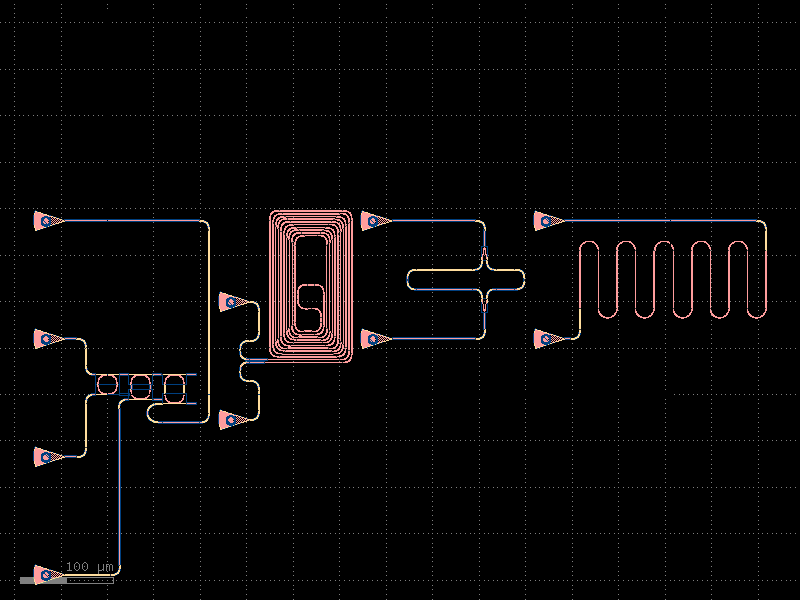

In [33]:
my_submission = gf.Component(name="MySubmission")
floorplan = gf.components.rectangle(size=(605, 410), layer='FLOORPLAN')
dl1 = my_submission.add_ref(delay_line_1)
dl2 = my_submission.add_ref(delay_line_2)
mzi = my_submission.add_ref(TE_MZI)
my = my_submission.add_ref(my_device_fibers)

my_submission.distribute(elements=(my, dl1, mzi, dl2,), direction='x', spacing=10, separation=True)
my_submission.align(elements=(dl1, dl2, mzi, my), alignment='ymax')

my_submission.add_ref(floorplan)
my_submission.plot()
plt.show()


In [63]:
plt.close('all')

In [34]:
dl2.move(origin=dl2.center, destination = dl2.center + (-250, -200))
my_submission.plot()


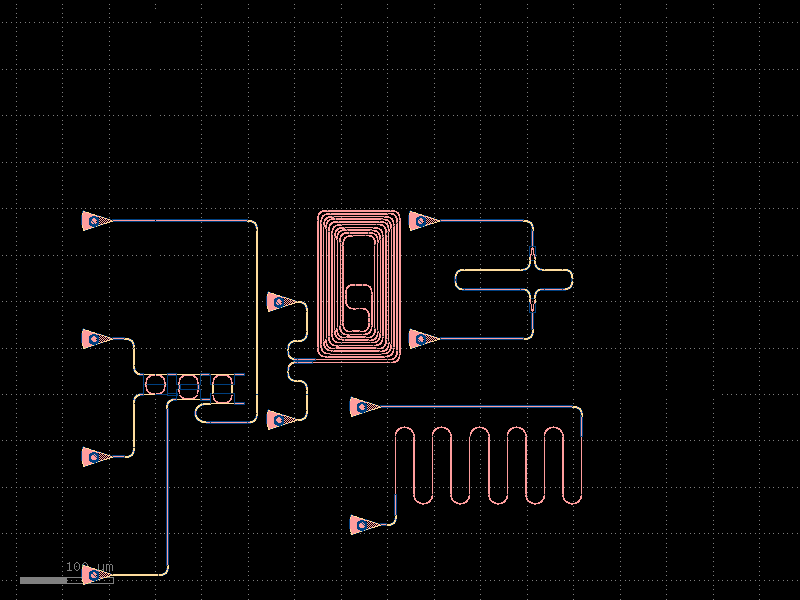

In [35]:
plt.show()

In [40]:
my_submission_2.write_gds("my_submission.gds")

2024-02-02 11:06:32.477 | INFO     | gdsfactory.component:_write_library:1913 - Wrote to 'my_submission.gds'


PosixPath('my_submission.gds')